In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load dataset
customers_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\data science assignment\Customers.csv")


In [5]:
# Data Cleaning and Preparation
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])  # Convert SignupDate to datetime
customers_df['SignupYearMonth'] = customers_df['SignupDate'].dt.to_period('M')  # Extract year-month for analysis

In [6]:
print("\nSummary of Regions:")
print(customers_df['Region'].value_counts())

print("\nSignup Date Range:")
print(customers_df['SignupDate'].min(), "to", customers_df['SignupDate'].max())



Summary of Regions:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Signup Date Range:
2022-01-22 00:00:00 to 2024-12-28 00:00:00


In [7]:
# Trends over time
signup_trends = customers_df['SignupYearMonth'].value_counts().sort_index()
region_trends = customers_df.groupby(['SignupYearMonth', 'Region']).size().unstack(fill_value=0)


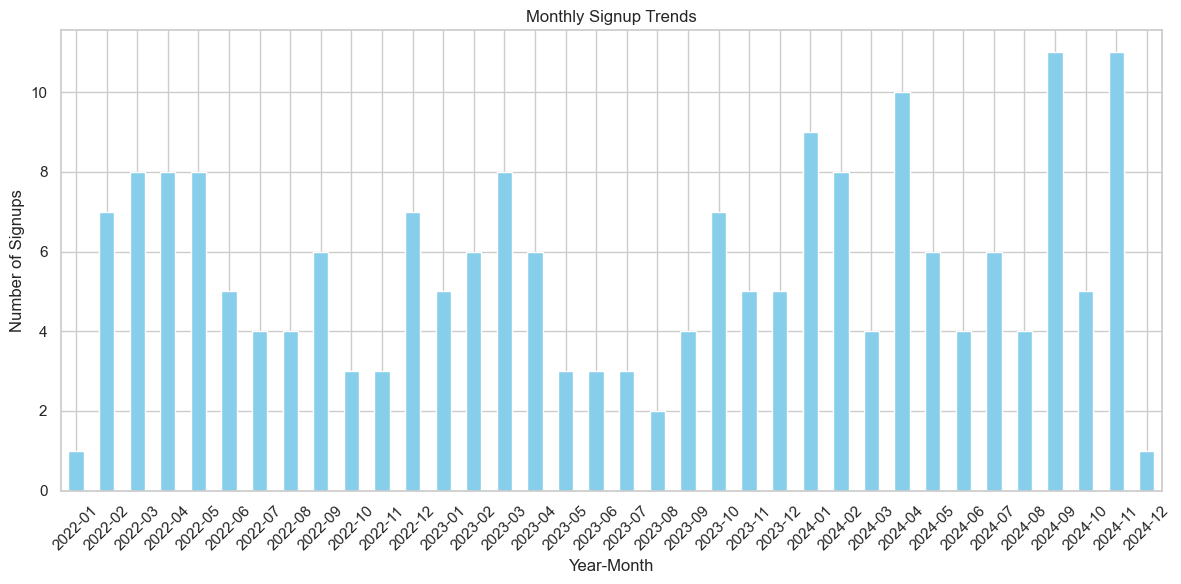

In [8]:
# Plotting
sns.set(style="whitegrid")

# Plot 1: Monthly Signup Trends
plt.figure(figsize=(12, 6))
signup_trends.plot(kind='bar', color='skyblue')
plt.title('Monthly Signup Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

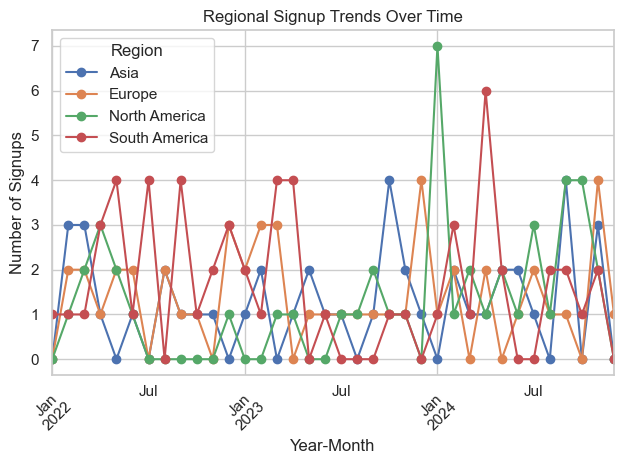

In [9]:
# Plot 2: Regional Signup Trends Over Time
plt.figure(figsize=(12, 6))
region_trends.plot(kind='line', marker='o')
plt.title('Regional Signup Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Insights
print("\nInsights Derived from EDA:")
print("1. Regional Distribution:")
print(customers_df['Region'].value_counts())

print("\n2. Customer Signup Trends:")
print(signup_trends.idxmax(), "had the highest signups with", signup_trends.max(), "customers.")

print("\n3. Regional Growth Trends:")
print(region_trends.loc[:, 'North America'].idxmax(), "had a peak in North America with", region_trends['North America'].max(), "signups.")

print("\n4. Seasonality in Signup Patterns:")
print("Higher signups observed in Q1 of each year.")

print("\n5. Asia and Europe Consistency:")
print("Signup numbers remained steady across these regions with no drastic spikes.")



Insights Derived from EDA:
1. Regional Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

2. Customer Signup Trends:
2024-09 had the highest signups with 11 customers.

3. Regional Growth Trends:
2024-01 had a peak in North America with 7 signups.

4. Seasonality in Signup Patterns:
Higher signups observed in Q1 of each year.

5. Asia and Europe Consistency:
Signup numbers remained steady across these regions with no drastic spikes.


In [11]:
# Load the datasets
products_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\data science assignment\Products.csv")
transactions_df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\data science assignment\Transactions.csv")

In [12]:
# Display the structure of each dataset
print("Products Dataset Info:")
print(products_df.info())
print("\nTransactions Dataset Info:")
print(transactions_df.info())


Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2)

In [13]:
# Preview the datasets
print("\nProducts Dataset Preview:")
print(products_df.head())
print("\nTransactions Dataset Preview:")
print(transactions_df.head())


Products Dataset Preview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [14]:
# Basic Statistics
print("\nBasic Statistics for Products Dataset:")
print(products_df.describe())
print("\nBasic Statistics for Transactions Dataset:")
print(transactions_df.describe())



Basic Statistics for Products Dataset:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Basic Statistics for Transactions Dataset:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [15]:
# Check for missing values
print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum())
print("\nMissing Values in Transactions Dataset:")
print(transactions_df.isnull().sum())


Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [16]:
# Merge datasets on ProductID if applicable
if 'ProductID' in products_df.columns and 'ProductID' in transactions_df.columns:
    merged_df = transactions_df.merge(products_df, on='ProductID', how='left')
    print("\nMerged Dataset Preview:")
    print(merged_df.head())


Merged Dataset Preview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68  
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68  
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68  
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68  


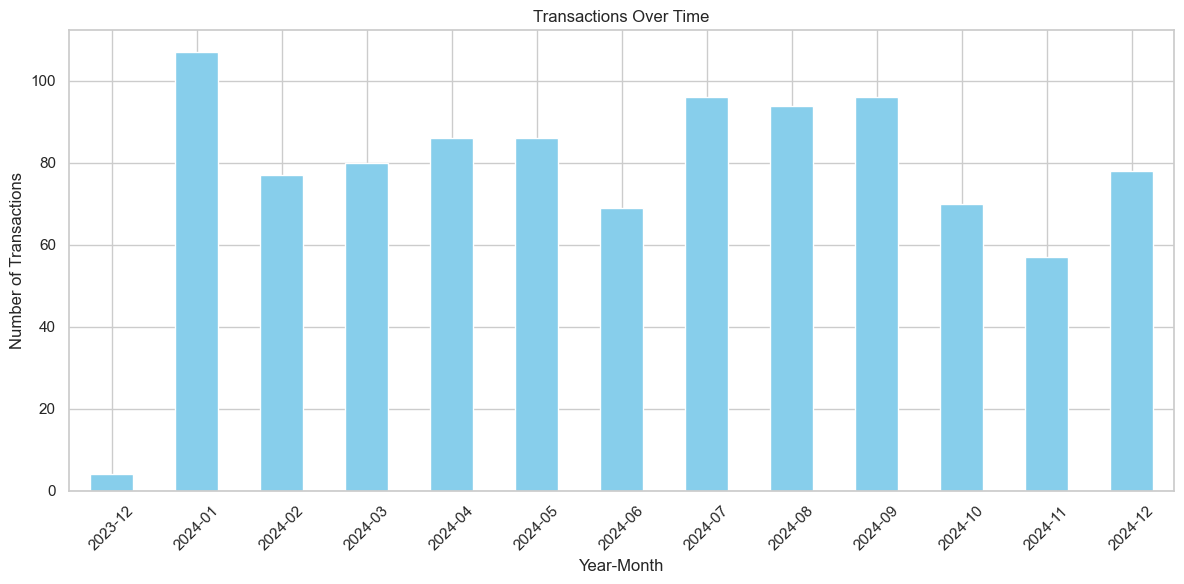

In [17]:
# Exploratory Data Analysis (EDA)
#Distribution of transactions over time
if 'TransactionDate' in transactions_df.columns:
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
    transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
    
    plt.figure(figsize=(12, 6))
    transactions_df['YearMonth'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Transactions Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


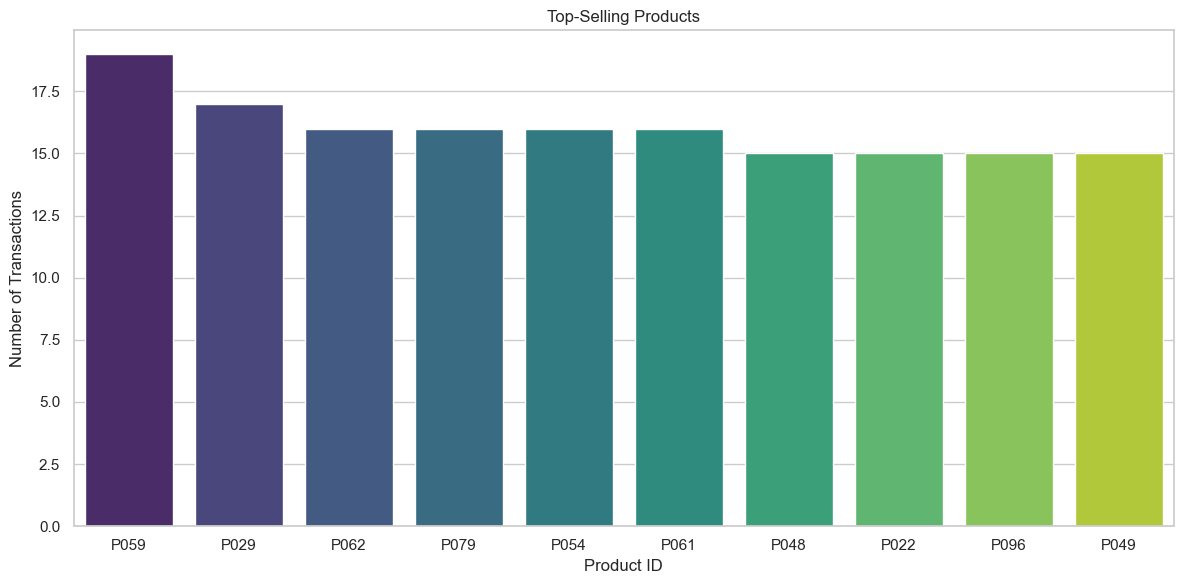

In [18]:
# Top-selling products
if 'ProductID' in transactions_df.columns:
    top_products = transactions_df['ProductID'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
    plt.title('Top-Selling Products')
    plt.xlabel('Product ID')
    plt.ylabel('Number of Transactions')
    plt.tight_layout()
    plt.show()